1. VISLUALIZACIÓN DE LA IMÁGENE Y DE SUS CANALES

Text(0.5, 1.0, 'Channel BLUE')

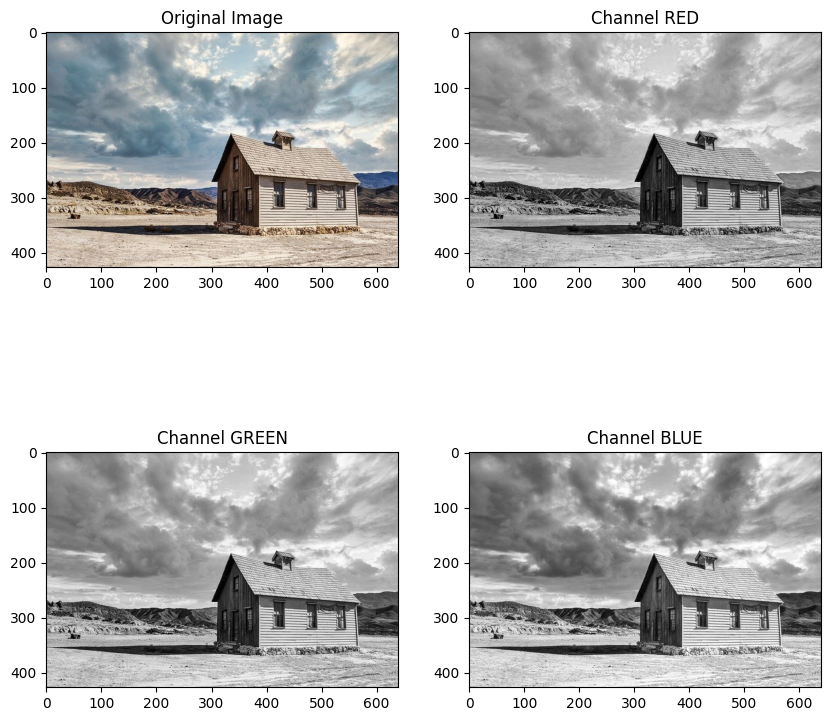

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("Landscape.jpg")

#I want to show the image and the three channels
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(2,2,2)
plt.imshow(img[:,:,0], cmap="gray")
plt.title("Channel RED")

plt.subplot(2,2,3)
plt.imshow(img[:,:,1], cmap="gray")
plt.title("Channel GREEN")

plt.subplot(2,2,4)
plt.imshow(img[:,:,2], cmap="gray")
plt.title("Channel BLUE")

2. CÁLCULOS DE ESTADÍSTICAS

In [3]:
import pandas as pd

red_channel = img[:,:,0]
green_channel = img[:,:,1]
blue_channel = img[:,:,2]

red_mean = red_channel.mean()
green_mean = green_channel.mean()
blue_mean = blue_channel.mean()

red_std = red_channel.std()
green_std = green_channel.std()
blue_std = blue_channel.std()

data = pd.DataFrame(columns=["Mean", "Standard Deviation"], index=["Red", "Green", "Blue"])
data.loc["Red"] = [red_mean, red_std]
data.loc["Green"] = [green_mean, green_std]
data.loc["Blue"] = [blue_mean, blue_std]

data

C:\Users\mario\AppData\Local\Temp\ipykernel_13768\3135459790.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Mean,Standard Deviation
Red,157.821838,52.427288
Green,159.220506,53.888831
Blue,157.323233,56.728633


3. TAREAS ARITMÉTICAS Y BOOLEANAS

Text(0.5, 1.0, 'AND Operation')

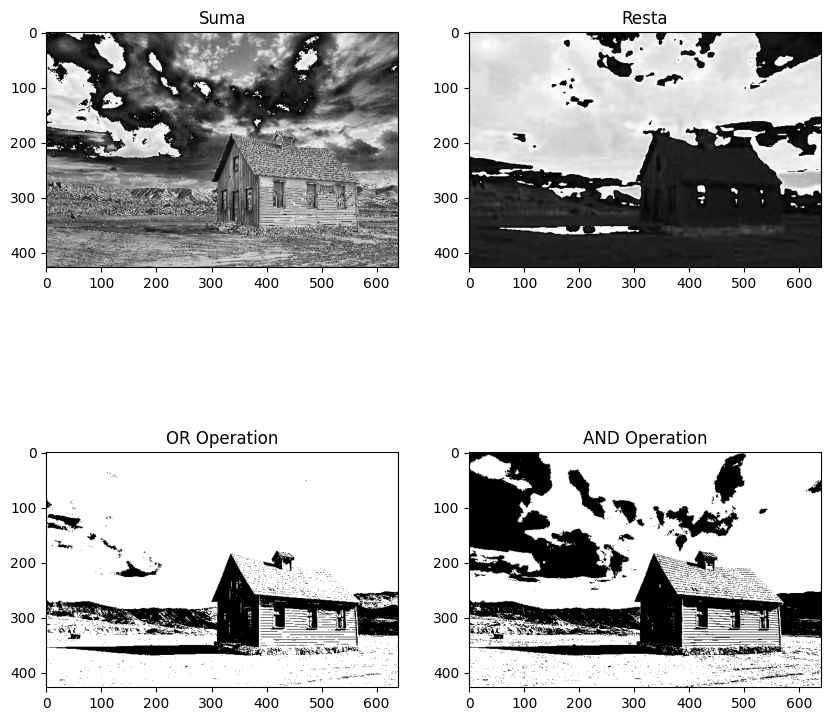

In [4]:
suma = blue_channel + red_channel
resta = blue_channel - red_channel


_, bin_red_channel = cv2.threshold(red_channel, 127, 255, cv2.THRESH_BINARY)
_, bin_blue_channel = cv2.threshold(blue_channel, 127, 255, cv2.THRESH_BINARY)

or_operation = cv2.bitwise_or(bin_red_channel, bin_blue_channel)
and_operation = cv2.bitwise_and(bin_red_channel, bin_blue_channel)

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(suma, cmap="gray")
plt.title("Suma")

plt.subplot(2,2,2)
plt.imshow(resta, cmap="gray")
plt.title("Resta")

plt.subplot(2,2,3)
plt.imshow(or_operation, cmap="gray")
plt.title("OR Operation")

plt.subplot(2,2,4)
plt.imshow(and_operation, cmap="gray")
plt.title("AND Operation")

4. CÁLCULO DE HISTOGRAMA

Text(0.5, 1.0, 'AND Operation')

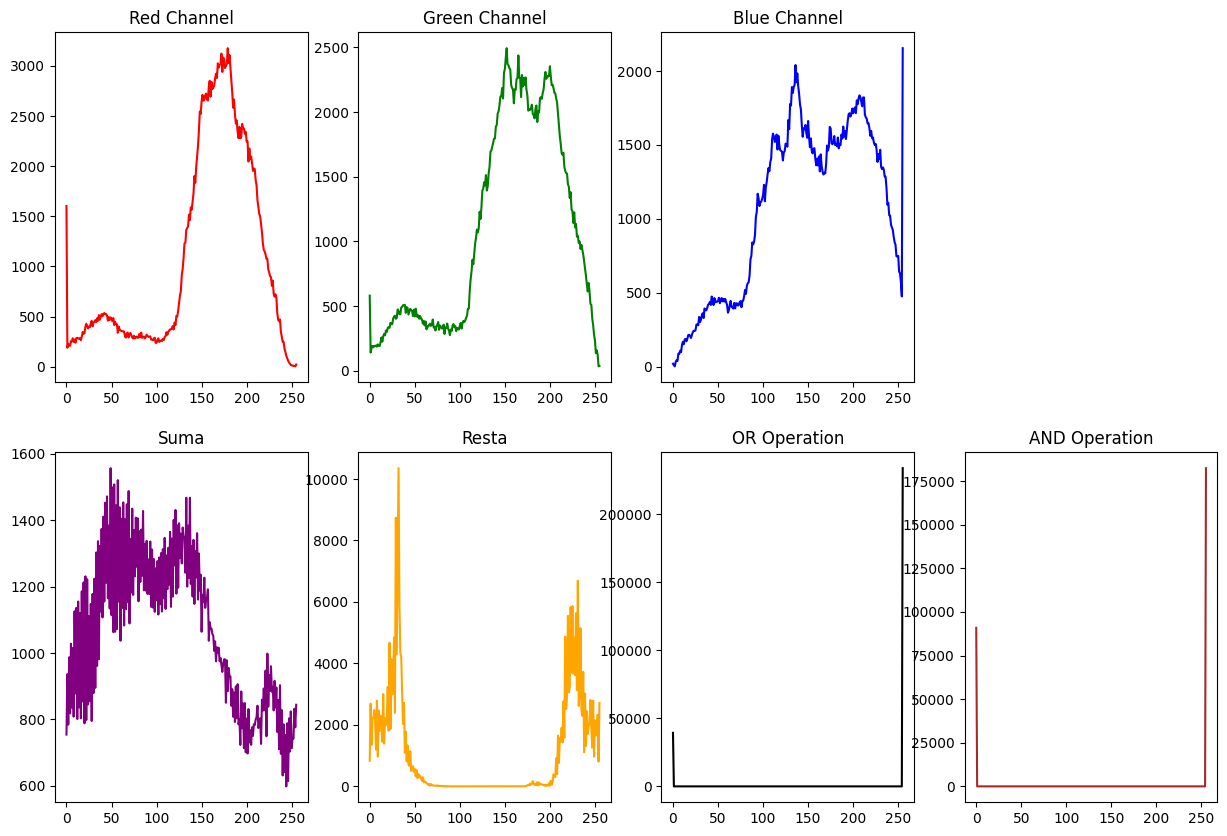

In [5]:
hist_red = cv2.calcHist([red_channel], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_channel], [0], None, [256], [0, 256])
hist_blue = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])

hist_suma = cv2.calcHist([suma], [0], None, [256], [0, 256])
hist_resta = cv2.calcHist([resta], [0], None, [256], [0, 256])
hist_or = cv2.calcHist([or_operation], [0], None, [256], [0, 256])
hist_and = cv2.calcHist([and_operation], [0], None, [256], [0, 256])

plt.figure(figsize=(15,10))

plt.subplot(2,4,1)
plt.plot(hist_red, color="red")
plt.title("Red Channel")

plt.subplot(2,4,2)
plt.plot(hist_green, color="green")
plt.title("Green Channel")

plt.subplot(2,4,3)
plt.plot(hist_blue, color="blue")
plt.title("Blue Channel")

plt.subplot(2,4,5)
plt.plot(hist_suma, color="purple")
plt.title("Suma")

plt.subplot(2,4,6)
plt.plot(hist_resta, color="orange")
plt.title("Resta")

plt.subplot(2,4,7)
plt.plot(hist_or, color="black")
plt.title("OR Operation")

plt.subplot(2,4,8)
plt.plot(hist_and, color="brown")
plt.title("AND Operation")

5. FILTRADO EN EL DOMINIO ESPACIAL

Text(0.5, 1.0, 'Realzado de Bordes 5x5')

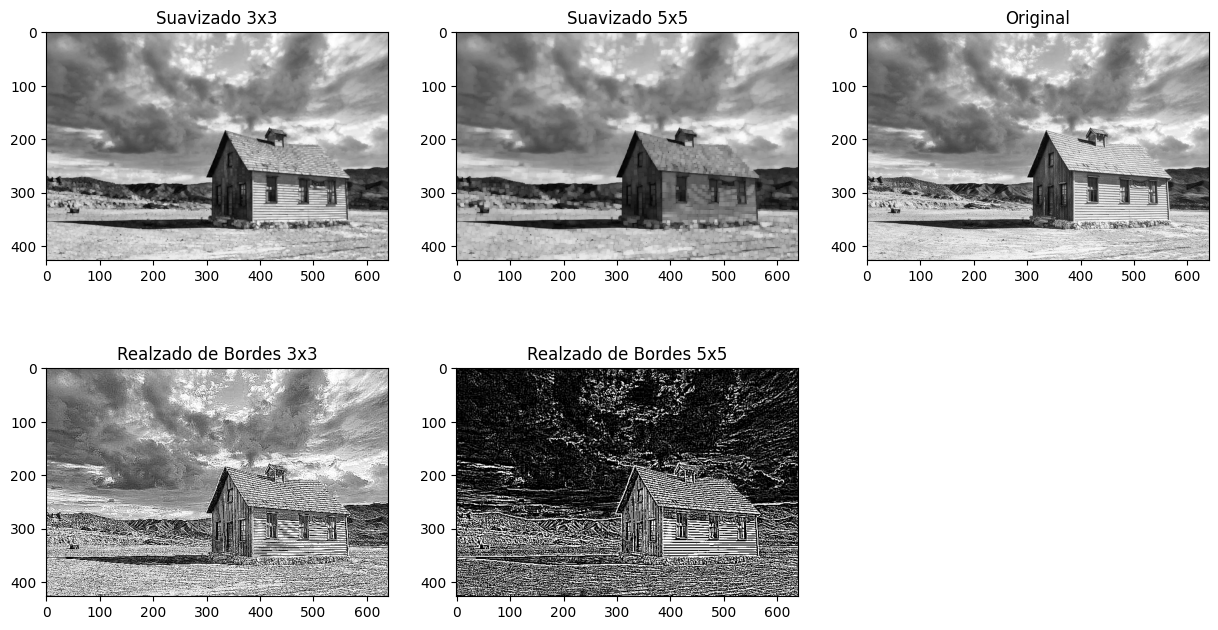

In [10]:
import numpy as np

suav_3x3 = np.ones((3,3), np.uint8)
suav_5x5 = np.ones((5,5), np.uint8)
bordes_3x3 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
bordes_5x5 = np.array([[-1,-1,-1,-1,-1], [-1,-1,-1,-1,-1], [-1,-1,24,-1,-1], [-1,-1,-1,-1,-1], [-1,-1,-1,-1,-1]])

imagen_suav_3x3 = cv2.morphologyEx(blue_channel, cv2.MORPH_OPEN, suav_3x3)
imagen_suav_5x5 = cv2.morphologyEx(blue_channel, cv2.MORPH_OPEN, suav_5x5)

imagen_bordes_3x3 = cv2.filter2D(blue_channel, -1, bordes_3x3)
imagen_bordes_5x5 = cv2.filter2D(blue_channel, -1, bordes_5x5)

plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
plt.imshow(imagen_suav_3x3, cmap="gray")
plt.title("Suavizado 3x3")

plt.subplot(2,3,2)
plt.imshow(imagen_suav_5x5, cmap="gray")
plt.title("Suavizado 5x5")

plt.subplot(2,3,3)
plt.imshow(blue_channel, cmap="gray")
plt.title("Original")

plt.subplot(2,3,4)
plt.imshow(imagen_bordes_3x3, cmap="gray")
plt.title("Realzado de Bordes 3x3")

plt.subplot(2,3,5)
plt.imshow(imagen_bordes_5x5, cmap="gray")
plt.title("Realzado de Bordes 5x5")



6. TRANSFORMADA DE FOURIER

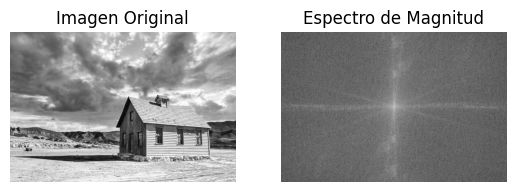

In [11]:
dft = cv2.dft(np.float32(blue_channel), flags=cv2.DFT_COMPLEX_OUTPUT)

# Desplazar la componente de baja frecuencia al centro de la imagen
dft_shift = np.fft.fftshift(dft)

# Calcular el espectro de magnitud
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

# Mostrar la imagen original y el espectro de magnitud
plt.subplot(121), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Espectro de Magnitud'), plt.axis('off')

plt.show()

7. FILTRADO EN EL DOMINIO DE FOURIER

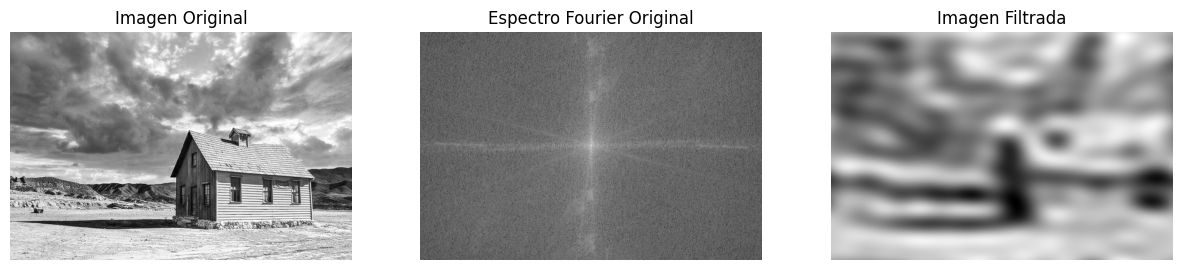

In [26]:
filas, columnas = magnitude_spectrum.shape

mascara = np.zeros((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 10, (1, 1), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()

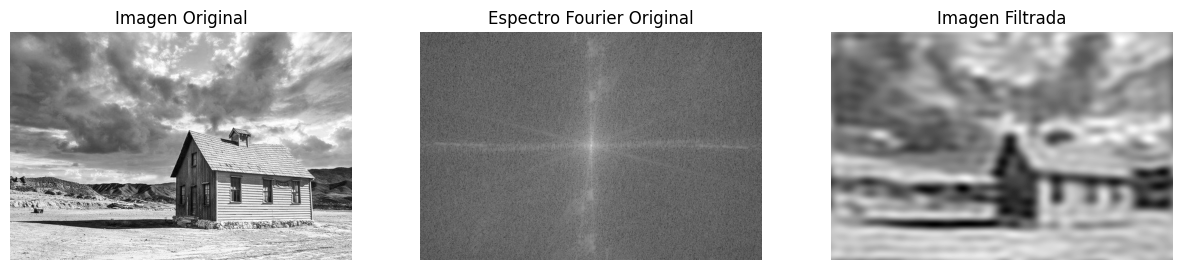

In [27]:
filas, columnas = magnitude_spectrum.shape

mascara = np.zeros((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 20, (1, 1), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()

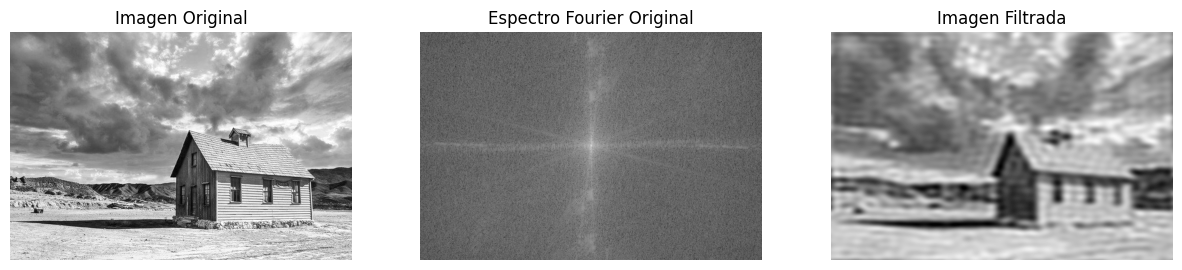

In [28]:
filas, columnas = magnitude_spectrum.shape

mascara = np.zeros((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 30, (1, 1), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()

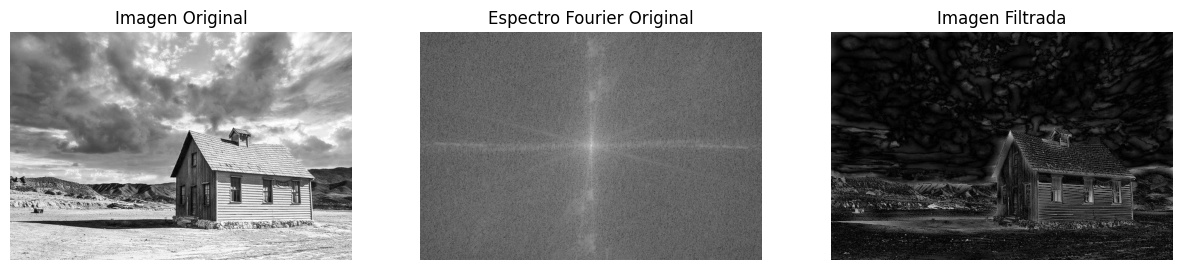

In [29]:
filas, columnas = magnitude_spectrum.shape

mascara = np.ones((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 10, (0, 0), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()

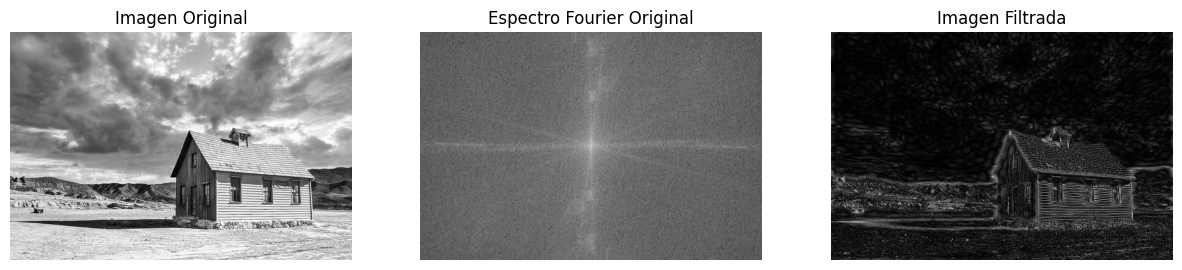

In [30]:
filas, columnas = magnitude_spectrum.shape

mascara = np.ones((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 20, (0, 0), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()

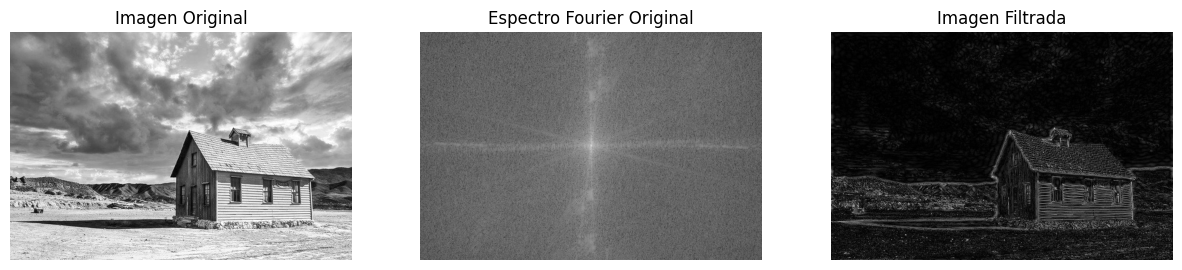

In [31]:
filas, columnas = magnitude_spectrum.shape

mascara = np.ones((filas, columnas, 2), np.uint8)
centro_fila, centro_columna = filas // 2, columnas // 2
cv2.circle(mascara, (centro_columna, centro_fila), 30, (0, 0), -1)

dft_filtrada = dft_shift * mascara

dft_filtrada_shift = np.fft.ifftshift(dft_filtrada)

imagen_filtrada = cv2.idft(dft_filtrada_shift)
imagen_filtrada = cv2.magnitude(imagen_filtrada[:, :, 0], imagen_filtrada[:, :, 1])


plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(blue_channel, cmap='gray')
plt.title('Imagen Original'), plt.axis('off')

plt.subplot(132), plt.imshow(np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1])), cmap='gray')
plt.title('Espectro Fourier Original'), plt.axis('off')

plt.subplot(133), plt.imshow(imagen_filtrada, cmap='gray')
plt.title('Imagen Filtrada'), plt.axis('off')

plt.show()